In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# 1. Which parts of Catalonia have higher/lower winds
In this section an study of the winds is performed to then choose which part of Catalonia will be studied.

In [2]:
stations = pd.read_json('data/stations.json')

## 1.1. Stations data
For each stations calculate various metrics for each wind component (u,v).

In [3]:
stations = stations[stations.data_fi.isna()]
stations.head()

,codi_estacio,nom_estacio,codi_tipus,latitud,longitud,geocoded_column,emplacament,altitud,codi_municipi,nom_municipi,codi_comarca,nom_comarca,codi_provincia,nom_provincia,codi_xarxa,nom_xarxa,codi_estat_ema,nom_estat_ema,data_inici,:@computed_region_bh64_c7uy,:@computed_region_wvic_k925,data_fi
0,CC,Orís,A,42.07398,2.20862,"{'type': 'Point', 'coordinates': [2.20862, 42....",Abocador comarcal,626.0,573,Orís,24,Osona,8,Barcelona,1,XEMA,2,Operativa,1995-11-15T00:00:00.000,100.0,13.0,NaN
1,CL,Sant Salvador de Guardiola,A,41.67399,1.76796,"{'type': 'Point', 'coordinates': [1.76796, 41....",Urbanització Miralda,349.0,203,Sant Salvador de Guardiola,7,Bages,8,Barcelona,1,XEMA,2,Operativa,1996-02-02T00:00:00.000,630.0,18.0,NaN
2,WL,Sant Martí de Riucorb,A,41.57236,1.08820,"{'type': 'Point', 'coordinates': [1.0882, 41.5...","Camí de les Comes, pol. 2, parc. 137",413.0,866,Sant Martí de Riucorb,38,Urgell,25,Lleida,1,XEMA,2,Operativa,2002-02-05T00:00:00.000,599.0,17.0,NaN
3,MQ,Cardona,A,41.92047,1.69584,"{'type': 'Point', 'coordinates': [1.69584, 41....",Boca nord del túnel de desviament del Cardener,402.0,180,Cardona,7,Bages,8,Barcelona,1,XEMA,2,Operativa,2003-01-16T00:00:00.000,140.0,18.0,NaN
4,X4,Barcelona - el Raval,A,41.38390,2.16775,"{'type': 'Point', 'coordinates': [2.16775, 41....",Facultat de Geografia i Història. c. Montalegr...,33.0,332,Barcelona,13,Barcelonès,8,Barcelona,1,XEMA,2,Operativa,2006-10-11T00:00:00.000,512.0,29.0,NaN


In [4]:
stations_stats = []
import math

for station in stations.codi_estacio.unique():
    try:
        df_station = pd.read_csv(f'data/data_by_station/{station}.zip', compression='zip')
        new_station = {'codi_estacio': station, 'comarca':stations[stations.codi_estacio == station].nom_comarca.values[0]}

        df_station['w10'] = (df_station.u10 ** 2) + (df_station.v10 ** 2)
        df_station['w6'] = (df_station.u6 ** 2) + (df_station.v6 ** 2)
        df_station['w2'] = (df_station.u2 ** 2) + (df_station.v2 ** 2)

        df_station['w10'] = df_station['w10'].apply(lambda x: math.sqrt(x))
        df_station['w6'] = df_station['w6'].apply(lambda x: math.sqrt(x))
        df_station['w2'] = df_station['w2'].apply(lambda x: math.sqrt(x))

        new_station['w10_mean'], new_station['w10_std'] = df_station.w10.mean(), df_station.w10.std()
        new_station['w6_mean'], new_station['w6_std'] = df_station.w6.mean(), df_station.w6.std()
        new_station['w2_mean'], new_station['w2_std'] = df_station.w2.mean(), df_station.w2.std()

        stations_stats.append(new_station)
    except:
        pass

stations_stats = pd.DataFrame(stations_stats)

In [5]:
extreme_stations = []

alturas = [10, 6, 2]
for h in alturas:
    max_w_h, max_w_std = stations_stats[f"w{h}_mean"].max(), stations_stats[stations_stats[f"w{h}_mean"] == stations_stats[f"w{h}_mean"].max()][f"w{h}_std"].values[0]
    print(f'Altura {h}: \n\tmax w:  {max_w_h:.2f} ±{max_w_std:.2f}')
    
    max_u_cod = stations_stats[(stations_stats[f"w{h}_mean"] == max_w_h)].codi_estacio.values[0]

    extreme_stations.append([max_u_cod])


Altura 10: 
	max w:  7.23 ±5.21
Altura 6: 
	max w:  5.13 ±3.15
Altura 2: 
	max w:  2.23 ±1.59


In [6]:
filled_stations = stations_stats[stations_stats.w10_mean > 0]

print(f'\nMean wind: {filled_stations.w10_mean.mean():.2f}, Min: {filled_stations.w10_mean.min():.2f} ({filled_stations[filled_stations.w10_mean.min() == filled_stations.w10_mean].codi_estacio.values[0]}), Max: {filled_stations.w10_mean.max():.2f} ({filled_stations[filled_stations.w10_mean.max() == filled_stations.w10_mean].codi_estacio.values[0]})')



Mean wind: 2.58, Min: 1.09 (CL), Max: 7.23 (D6)


In [8]:
stations_stats[stations_stats.codi_estacio == 'C6']

,codi_estacio,comarca,w10_mean,w10_std,w6_mean,w6_std,w2_mean,w2_std
76,C6,Pla d'Urgell,2.718843,1.858884,0.0,0.0,0.0,0.0


In [24]:
df_station = pd.read_csv(f'data/data_by_station/C6.zip', compression='zip')
df_station['HR'].mean()

72.06033794267981

# 2. Plot of the WRF times

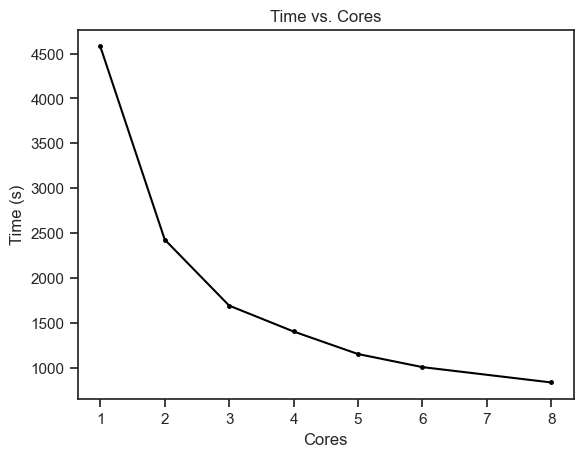

In [3]:
import seaborn as sns

sns.set_theme(style="ticks")

times = [76.33, 40.45, 28.18, 23.37, 19.18, 16.75, 13.9]
times = [t * 60 for t in times]
cores = [1, 2, 3, 4, 5, 6, 8]

# make a line plot of time vs. cores
plt.plot(cores, times, marker='.', markersize=5, color='black')
plt.xlabel('Cores')
plt.ylabel('Time (s)')
plt.title('WRF execution time vs. Number of Cores')
plt.show()